<a href="https://colab.research.google.com/github/KarimeZeraik/QSAR-and-ML/blob/main/QSAR_Trypanosoma_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code by Alexandre de F. Cobre [Github](https://github.com/AlexandreCOBRE/code)

PROJECT: Drug repurposing for trypanosomiasis.

MSc. Karime Z. A. Domingues (UFPR)

# PART 2: Exploratory data analysis

### 1: Import libraries

In [1]:
!pip install rdkit
import rdkit
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 22.8 MB/s eta 0:00:00


### 2: Import the database

In [3]:
# Dataset 1
from google.colab import files
uploaded = files.upload()

Saving dados_preprocessados.csv to dados_preprocessados (1).csv


In [4]:
# Import the Pandas library to help manipulate the datasets
import pandas as pd
df1 = pd.read_csv("dados_preprocessados.csv")
display (df1)

,molecule_chembl_id,canonical_smiles,classe_bioatividade,standard_value
0,CHEMBL55,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,Inactive,35.0
1,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,Inactive,58.0
2,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,Inactive,16.0
3,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,Inactive,16.5
4,CHEMBL267154,C(=C1/CCCN(c2ccc(C3=NCCN3)cc2)C1)\c1ccc(C2=NCC...,Inactive,71.0
...,...,...,...,...
21605,CHEMBL2314239,O=C(Cc1ccc(O)c(O)c1)NCCCCNCCCNC(=O)Cc1ccc(O)c(...,Inactive,5900.0
21606,CHEMBL41629,C(CCCNCCCNCC1CCCCCC1)CCCNCCCNCC1CCCCCC1,Inactive,160.0
21607,CHEMBL5274443,CN(C)CCCNc1cc(Cl)ccc1Sc1ccc(C(F)(F)F)cc1,Inactive,1200.0
21608,CHEMBL5285392,Br.C[N+](C)(CCCNc1cc(Cl)ccc1Sc1ccccc1)Cc1ccc([...,Inactive,600.0


In [5]:
df1_limpo = df1.dropna()

In [9]:
df1_limpo = df1.drop(labels=df1[df1['canonical_smiles'].isnull()].index.to_list())

In [21]:
df1_limpo


,molecule_chembl_id,canonical_smiles,classe_bioatividade,standard_value
0,CHEMBL55,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,Inactive,35.0
1,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,Inactive,58.0
2,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,Inactive,16.0
3,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,Inactive,16.5
4,CHEMBL267154,C(=C1/CCCN(c2ccc(C3=NCCN3)cc2)C1)\c1ccc(C2=NCC...,Inactive,71.0
...,...,...,...,...
21605,CHEMBL2314239,O=C(Cc1ccc(O)c(O)c1)NCCCCNCCCNC(=O)Cc1ccc(O)c(...,Inactive,5900.0
21606,CHEMBL41629,C(CCCNCCCNCC1CCCCCC1)CCCNCCCNCC1CCCCCC1,Inactive,160.0
21607,CHEMBL5274443,CN(C)CCCNc1cc(Cl)ccc1Sc1ccc(C(F)(F)F)cc1,Inactive,1200.0
21608,CHEMBL5285392,Br.C[N+](C)(CCCNc1cc(Cl)ccc1Sc1ccccc1)Cc1ccc([...,Inactive,600.0


### 3. Calculate the parameters of Lipinki's Rule of Five:

In [13]:
# Importing libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [14]:
# Obtaining Lipinski descriptors
# Inspired by : https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descritores = pd.DataFrame(data=baseData,columns=columnNames)

    return descritores

In [22]:
df_lipinski = lipinski(df1_limpo.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,340.427,2.88284,4.0,4.0
1,322.416,1.58134,4.0,4.0
2,322.416,1.58134,4.0,4.0
3,322.416,1.58134,4.0,4.0
4,385.515,3.07000,2.0,5.0
...,...,...,...,...
21603,445.516,1.28650,7.0,7.0
21604,464.827,6.01630,4.0,4.0
21605,388.886,5.87360,1.0,3.0
21606,527.892,6.64890,1.0,5.0


In [23]:
# Reading the initial dataframe
df=df1_limpo[['molecule_chembl_id','canonical_smiles','standard_value']]

In [24]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,340.427,2.88284,4.0,4.0
1,322.416,1.58134,4.0,4.0
2,322.416,1.58134,4.0,4.0
3,322.416,1.58134,4.0,4.0
4,385.515,3.07000,2.0,5.0
...,...,...,...,...
21603,445.516,1.28650,7.0,7.0
21604,464.827,6.01630,4.0,4.0
21605,388.886,5.87360,1.0,3.0
21606,527.892,6.64890,1.0,5.0


In [25]:
df = df1_limpo[['molecule_chembl_id',	'canonical_smiles','standard_value']].reset_index(drop=True)
df_lipinski = lipinski(df.canonical_smiles).reset_index(drop=True)

# Concatenate the two DataFrames
df1_limpo = pd.concat([df, df_lipinski], axis=1)

In [19]:
display(df_combinado)

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL55,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,35.0,340.427,2.88284,4.0,4.0
1,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,58.0,322.416,1.58134,4.0,4.0
2,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,16.0,322.416,1.58134,4.0,4.0
3,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,16.5,322.416,1.58134,4.0,4.0
4,CHEMBL267154,C(=C1/CCCN(c2ccc(C3=NCCN3)cc2)C1)\c1ccc(C2=NCC...,71.0,385.515,3.07000,2.0,5.0
...,...,...,...,...,...,...,...
43211,CHEMBL2314239,O=C(Cc1ccc(O)c(O)c1)NCCCCNCCCNC(=O)Cc1ccc(O)c(...,5900.0,445.516,1.28650,7.0,7.0
43212,CHEMBL41629,C(CCCNCCCNCC1CCCCCC1)CCCNCCCNCC1CCCCCC1,160.0,464.827,6.01630,4.0,4.0
43213,CHEMBL5274443,CN(C)CCCNc1cc(Cl)ccc1Sc1ccc(C(F)(F)F)cc1,1200.0,388.886,5.87360,1.0,3.0
43214,CHEMBL5285392,Br.C[N+](C)(CCCNc1cc(Cl)ccc1Sc1ccccc1)Cc1ccc([...,600.0,527.892,6.64890,1.0,5.0


In [26]:
# Descriptive analysis of non-standardized IC50 values
df1_limpo.standard_value.describe()

,standard_value
count,2.160800e+04
mean,7.246343e+04
std,1.709298e+06
min,0.000000e+00
25%,9.800000e+02
50%,7.610000e+03
75%,3.200000e+04
max,2.010000e+08


### 4: Normalize IC50 values

To ensure normal data distribution, we will convert the IC50 values ​​to a negative logarithmic scale: -log10.
To do this we will create the function "pIC50 ()" we will:
a) First multiply all IC50 values ​​by 10-9, converting nM into M.
b) Second: From these results (M unit), we will calculate the "-log10".
Finally, we will delete the variable that contains original IC50 values ​​(non-standardized data) and create a new column with pIC50 values.

In [27]:
# Creating the pIC50 function
# Inspired by: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(labels='standard_value_norm', axis=1)

    return x

In [28]:
-np.log10( (10**-9)* 100000000 )

1.0

In [29]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [30]:
# Creating standardized normal values

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(labels='standard_value', axis=1)

    return x

In [31]:
# Viewing the data with normal values
df_normal = norm_value(df1_limpo)
display(df_normal)

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL55,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,340.427,2.88284,4.0,4.0,35.0
1,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,322.416,1.58134,4.0,4.0,58.0
2,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,322.416,1.58134,4.0,4.0,16.0
3,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,322.416,1.58134,4.0,4.0,16.5
4,CHEMBL267154,C(=C1/CCCN(c2ccc(C3=NCCN3)cc2)C1)\c1ccc(C2=NCC...,385.515,3.07000,2.0,5.0,71.0
...,...,...,...,...,...,...,...
21603,CHEMBL2314239,O=C(Cc1ccc(O)c(O)c1)NCCCCNCCCNC(=O)Cc1ccc(O)c(...,445.516,1.28650,7.0,7.0,5900.0
21604,CHEMBL41629,C(CCCNCCCNCC1CCCCCC1)CCCNCCCNCC1CCCCCC1,464.827,6.01630,4.0,4.0,160.0
21605,CHEMBL5274443,CN(C)CCCNc1cc(Cl)ccc1Sc1ccc(C(F)(F)F)cc1,388.886,5.87360,1.0,3.0,1200.0
21606,CHEMBL5285392,Br.C[N+](C)(CCCNc1cc(Cl)ccc1Sc1ccccc1)Cc1ccc([...,527.892,6.64890,1.0,5.0,600.0


In [32]:
# Describing the new Dataframe
df_normal.describe()

,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
count,21608.000000,21608.000000,21608.000000,21608.000000,2.160800e+04
mean,382.363135,3.484201,1.567151,5.084228,6.778923e+04
std,126.447257,2.033597,1.678084,2.701848,1.230998e+06
min,90.078000,-13.288360,0.000000,0.000000,0.000000e+00
25%,305.430000,2.369500,0.000000,3.000000,9.800000e+02
50%,361.414000,3.558335,1.000000,5.000000,7.610000e+03
75%,428.532000,4.649375,2.000000,6.000000,3.200000e+04
max,2182.774000,13.551600,28.000000,29.000000,1.000000e+08


In [33]:
# Applying the pI50 function
df_final = pIC50(df_normal)
display(df_final)

<ipython-input-27-26361dfb9fa4>:11: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL55,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,340.427,2.88284,4.0,4.0,7.455932
1,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,322.416,1.58134,4.0,4.0,7.236572
2,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,322.416,1.58134,4.0,4.0,7.795880
3,CHEMBL9126,N=C(N)c1ccc(N2CCN(c3ccc(C(=N)N)cc3)CC2)cc1,322.416,1.58134,4.0,4.0,7.782516
4,CHEMBL267154,C(=C1/CCCN(c2ccc(C3=NCCN3)cc2)C1)\c1ccc(C2=NCC...,385.515,3.07000,2.0,5.0,7.148742
...,...,...,...,...,...,...,...
21603,CHEMBL2314239,O=C(Cc1ccc(O)c(O)c1)NCCCCNCCCNC(=O)Cc1ccc(O)c(...,445.516,1.28650,7.0,7.0,5.229148
21604,CHEMBL41629,C(CCCNCCCNCC1CCCCCC1)CCCNCCCNCC1CCCCCC1,464.827,6.01630,4.0,4.0,6.795880
21605,CHEMBL5274443,CN(C)CCCNc1cc(Cl)ccc1Sc1ccc(C(F)(F)F)cc1,388.886,5.87360,1.0,3.0,5.920819
21606,CHEMBL5285392,Br.C[N+](C)(CCCNc1cc(Cl)ccc1Sc1ccccc1)Cc1ccc([...,527.892,6.64890,1.0,5.0,6.221849


In [34]:
# Saving the dataset with three classes
df_final.to_csv("dataset_3classes.csv")

In [35]:
# Describing the Final dataframe
df_final.pIC50.describe()

,pIC50
count,2.160800e+04
mean,inf
std,NaN
min,1.000000e+00
25%,4.494850e+00
50%,5.118615e+00
75%,6.008774e+00
max,inf


In [46]:
# Now we will remove the "intermediate" class from the final database
df_2classes = df_final[df_final.classe_bioatividade != 'Intermediate']
df_2classes

AttributeError: 'DataFrame' object has no attribute 'classe_bioatividade'

### 5: Carry out the exploratory analysis itself: Pfizer Rule (Lipinski)



In [39]:
!pip install seaborn

In [40]:
# Importing libraries
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

#### 5.1 Creating the frequency graph of the two classes of compounds (active versus inactive)

In [43]:
# Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='classe_bioatividade', data=df_final, edgecolor='black')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


# Saving the plot in PDF format
plt.savefig('plot_bioactivity_class.pdf')

ValueError: Could not interpret value `Bioactivity Class` for `x`. An entry with this name does not appear in `data`.

<Figure size 550x550 with 0 Axes>

In [42]:
# Creating the scatter plot of molecular weight versus LogP
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2classes, hue='classe_bioatividade', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Molecular weight (g/mol)', fontsize=14, fontweight='bold')
plt.ylabel('LogP (Oil/Water)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

NameError: name 'df_2classes' is not defined

<Figure size 550x550 with 0 Axes>

### Building the box plot graph of bioactivity versus pIC50 values

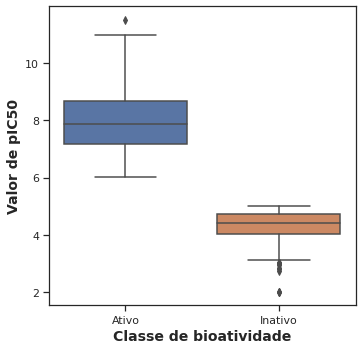

In [ ]:
# Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'classe_bioatividade', y = 'pIC50', data = df_2classes)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')


# Saving the chart
plt.savefig('plot_ic50.pdf')

### Comparing the two groups: Mann-Whitney statistics

In [ ]:
def mannwhitney(descriptor, verbose=False):
  ## Inspired by: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# Seed the random number generator
  seed(1)

# Actives and Inactives
  selection = [descriptor, 'classe_bioatividade']
  df = df_2classes[selection]
  ativo = df[df.classe_bioatividade == 'Active']
  ativo = ativo[descriptor]

  selection = [descriptor, 'classe_bioatividade']
  df = df_2classes[selection]
  inativo = df[df.classe_bioatividade == 'Inactive']
  inativo = inativo[descriptor]

# Compare samples
  stat, p = mannwhitneyu(ativo, inativo)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret results
  alpha = 0.05
  if p > alpha:
    interpretation = 'Mesma distribuição (fail to reject H0)'
  else:
    interpretation = 'Diferentes distribuições (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

### Comparing molecular weight values ​​between the two classes of compounds: Mann-Whitney Test

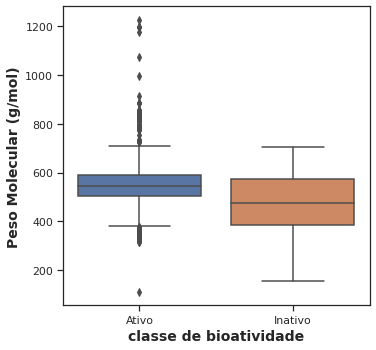

In [ ]:
# Molecular weight
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'MW', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Peso Molecular (g/mol)', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,424236.5,4.467740e-22,0.05,Diferentes distribuições (reject H0)


## Comparing LogP values ​​between the two classes of compounds: Mann-Whitney Test

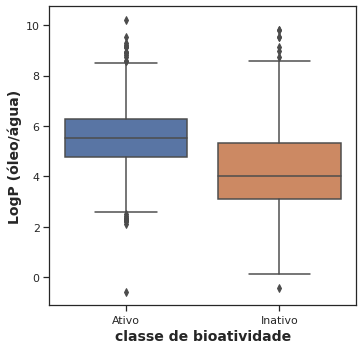

In [ ]:
# LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'LogP', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('LogP (óleo/água)', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,460731.0,1.710051e-37,0.05,Diferentes distribuições (reject H0)


### Comparing the number of hydrogen bond donor groups between the two classes of compounds: Mann-Whitney test

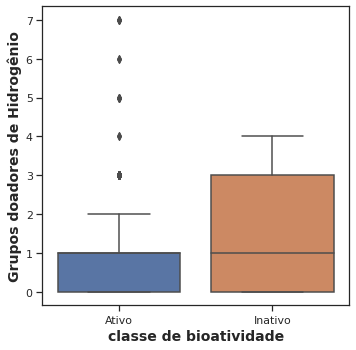

In [ ]:
# Hydrogen bond donating groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'NumHDonors', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Grupos doadores de Hidrogênio', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,216892.0,7.810460e-19,0.05,Diferentes distribuições (reject H0)


### Comparing the number of hydrogen bond acceptor groups between the two classes of compounds: Mann-Whitney test

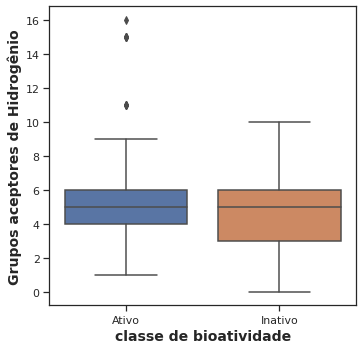

In [ ]:
# Hydrogen bond acceptor groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'NumHAcceptors', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Grupos aceptores de Hidrogênio', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,326615.5,0.19302,0.05,Mesma distribuição (fail to reject H0)


# Lastly, saving (zipping) all files generated in this Jupyter notebook

In [ ]:
! zip -r resultados.zip . -i *.csv *.pdf

  adding: dados_preprocessados.csv (deflated 88%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: dataset_3classes.csv (deflated 83%)
  adding: plot_NumHDonors.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 5%)
  adding: mannwhitneyu_MW.csv (deflated 4%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 7%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 6%)
  adding: mannwhitneyu_pIC50.csv (deflated 6%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_MW.pdf (deflated 36%)


In [ ]:
# Saving dataset_2classes for future analysis
df_2classes.to_csv("dataset_2classes.csv")
